In [23]:
import numpy as np
import pygame

In [24]:
from scipy.integrate import solve_ivp

In [25]:
def osc_dynamics(t, yv, alpha, k, m):
    y = yv[:len(yv) // 2]
    v = yv[len(yv) // 2:]
    #  [0 1 2 3 4 5]0 0
    #   0 0[0 1 2 3 4 5]
    #   0[0 1 2 3 4 5]0
    #   ---------------
    # zero pad
    yright = np.concatenate(([0, 0], y))
    yleft = np.concatenate((y, [0, 0]))
    ymid = np.concatenate(([0], y, [0]))
    a = (k * (yright + yleft - 2*ymid)[1:-1] / m) * (1 + alpha * (yright - yleft)[1:-1])
    a[0] = 0
    a[-1] = 0
    dydt = np.concatenate([v, a])
    return dydt

In [46]:
n_pts = 40
x_max = 500
x_coords = np.linspace(10, x_max - 10, n_pts, dtype=np.uint16)
alpha = 0.05
k = 1
m = 1
y0 = np.concatenate([np.zeros(n_pts, dtype=np.float64), np.sin(np.linspace(0, np.pi, n_pts))])
dt = 1
t_max = 1_000_000
t_eval = np.arange(0, t_max, dt)
sol = solve_ivp(osc_dynamics, (0, t_max), y0, t_eval=t_eval, args=(alpha, k, m), rtol=1e-3, atol=1e-6)

KeyboardInterrupt: 

In [47]:
sol_yv = sol["y"]
time = sol["t"]
sol_y = sol_yv[:n_pts]
sol_v = sol_yv[n_pts:]
sol_y.shape

(40, 1000000)

In [48]:
w = pygame.display.set_mode((x_max, 300))
running = True
t = 0
while running:
    
    w.fill((255, 255, 255))
    
    for i in range(len(x_coords)):
        pygame.draw.circle(w, (0,0,0), (x_coords[i], int(150 - 10 * sol_y[i, t])), 3)
        pygame.draw.circle(w, (255,255,255 * (1 - t / sol_y.shape[1])), (20, 20), 10)
    
    pygame.display.flip()

    for ev in pygame.event.get():
        if ev.type == pygame.QUIT:
            pygame.quit()
            running = False
    
    pygame.time.wait(1)
    t = (t + 1) % sol_y.shape[1]
    

<IPython.core.display.Javascript object>


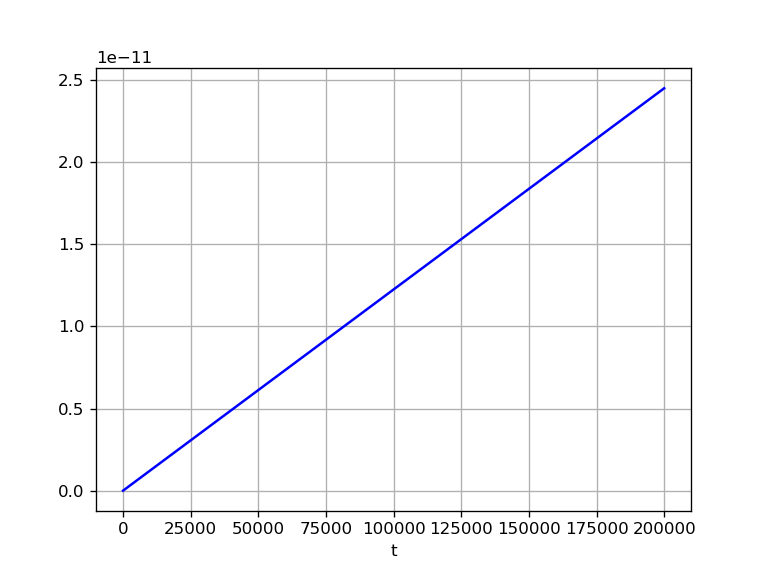

In [66]:
import matplotlib.pyplot as plt
%matplotlib notebook

idx = 39
plt.plot(time[:200_000:1], sol_y[idx, :200_000:1], 'b', label='y(t)')
# plt.plot(time, sol_v[:, idx], 'g', label='v(t)')
# plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


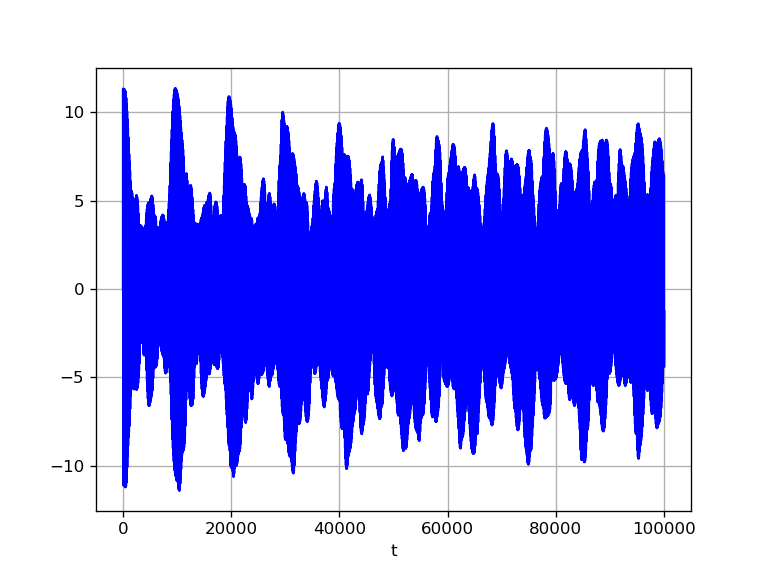

In [44]:
import matplotlib.pyplot as plt
%matplotlib notebook

idx = 14
plt.plot(time[::1], sol_y[idx, ::1], 'b', label='y(t)')
# plt.plot(time, sol_v[:, idx], 'g', label='v(t)')
# plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [58]:
y_sampled = sol_y[:, :200_000:]
y_sampled.shape

(40, 200000)

In [59]:
np.save("FPUTscipy.npy", y_sampled)

In [60]:
ft_mid = (np.fft.fft(y_sampled[19, :]))

<IPython.core.display.Javascript object>


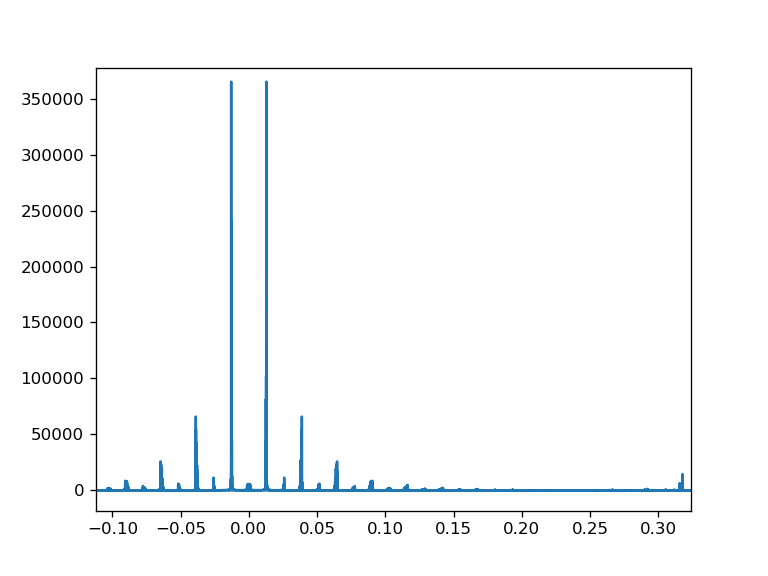

In [61]:
plt.figure()
plt.plot(np.fft.fftfreq(len(ft_mid)), abs(ft_mid))
plt.show()